<a href="https://colab.research.google.com/github/RINDHYA-26/RINDHYA-OIBSIP-TASK/blob/main_code/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK--2

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
data=pd.read_csv("Unemployment in India .csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


CHECK FOR MISSING VALUES

In [4]:
print(data.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


REMOVING MISSING VALUES

In [5]:

numeric_features = data.select_dtypes(include=['float64'])
data[numeric_features.columns] = data[numeric_features.columns].fillna(data.mean())
categorical_features = data.select_dtypes(include=['object'])
data[categorical_features.columns] = data[categorical_features.columns].fillna(data.mode().iloc[0])
print(data.isnull().sum())


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


<ipython-input-5-135ec8dca336>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[numeric_features.columns] = data[numeric_features.columns].fillna(data.mean())


INFORMATION OF DATASET

In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    768 non-null    object 
 1    Date                                     768 non-null    object 
 2    Frequency                                768 non-null    object 
 3    Estimated Unemployment Rate (%)          768 non-null    float64
 4    Estimated Employed                       768 non-null    float64
 5    Estimated Labour Participation Rate (%)  768 non-null    float64
 6   Area                                      768 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,768.000000,7.680000e+02,768.000000
mean,11.787946,7.204460e+06,42.630122
std,10.523784,7.938986e+06,7.961667
min,0.000000,4.942000e+04,13.330000
25%,4.720000,1.376532e+06,38.265000
50%,9.005000,5.064048e+06,41.430000
75%,15.472500,1.111390e+07,45.362500
max,76.740000,4.577751e+07,72.570000


DATA VISUALIZATION

<ipython-input-7-2f55296b567f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-7-2f55296b567f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


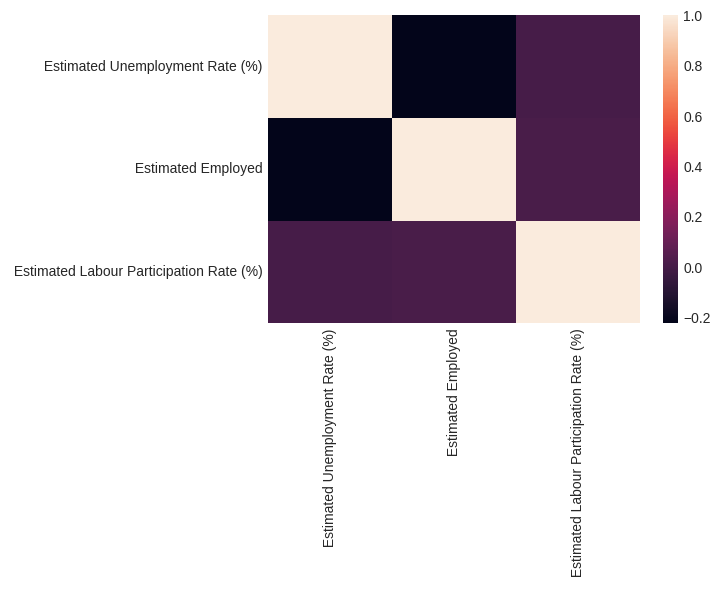

In [7]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6,4))
sns.heatmap(data.corr())
plt.show()

ESTIMATED EMPLOYED

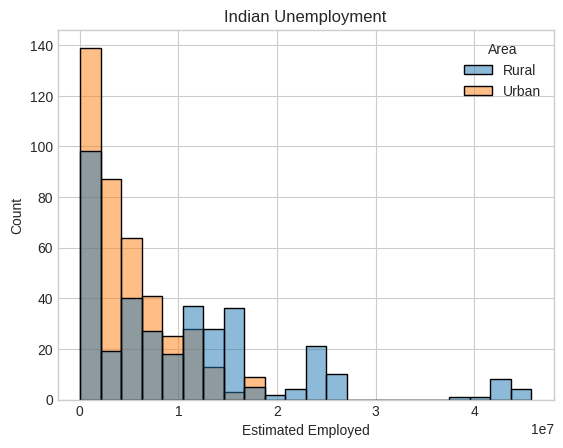

In [8]:
data.columns= ["Region","Date","Frequency",
               "Estimated Unemployment Rate (%)","Estimated Employed",
               "Estimated Labour Participation Rate (%)","Area"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Area", data=data)
plt.show()

Estimated Unemployment Rate

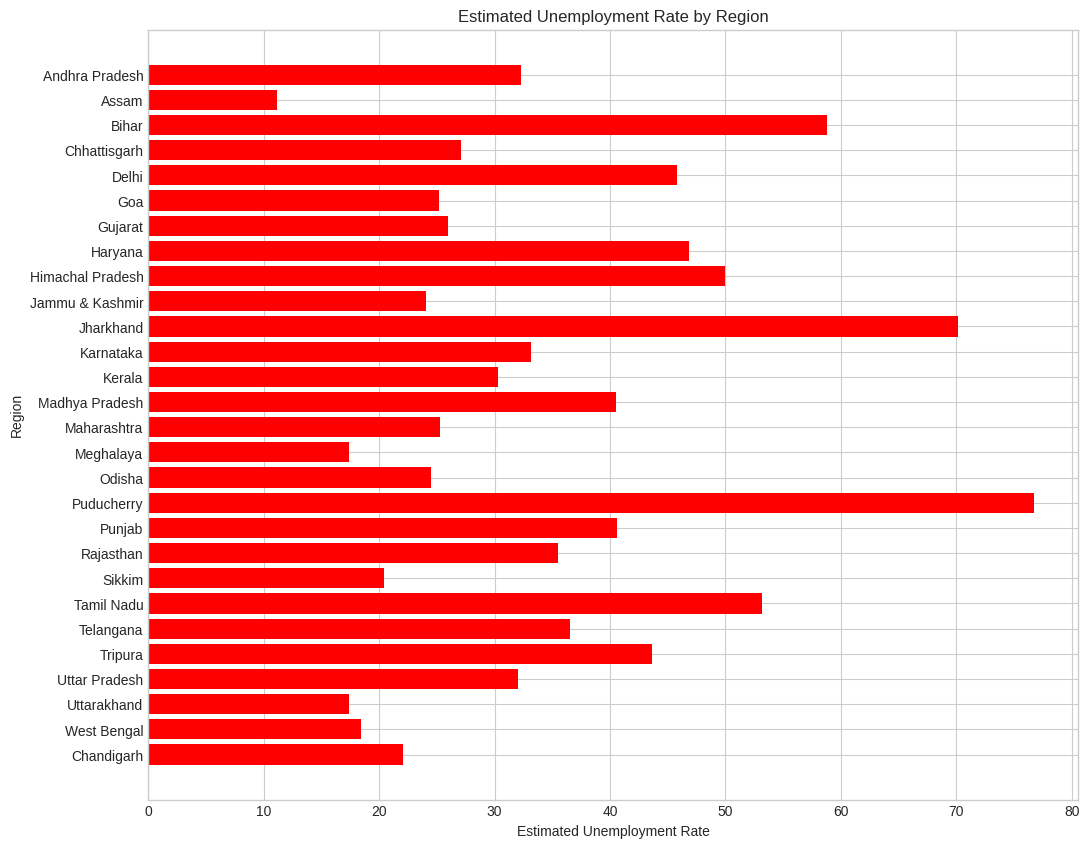

In [9]:

# Create a bar graph for Estimated Unemployment Rate by Region
plt.figure(figsize=(12,10))
plt.barh(data['Region'], data['Estimated Unemployment Rate (%)'], color='RED')
plt.xlabel('Estimated Unemployment Rate')
plt.ylabel('Region')
plt.title('Estimated Unemployment Rate by Region')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest rate at the top
plt.grid(axis='x', linestyle='-', alpha=1)  # Add grid lines on the x-axis
plt.show()

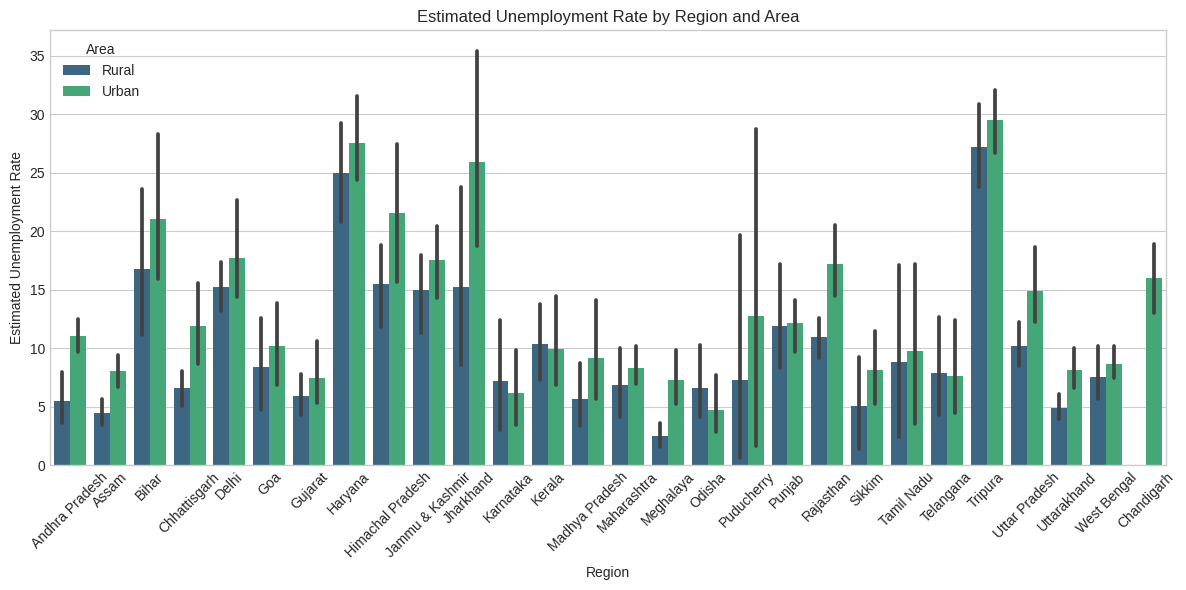

In [10]:
unemployment = data[["Region","Estimated Unemployment Rate (%)","Area"]]
plt.figure(figsize=(12, 6))
sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", hue="Area", data=unemployment, palette="viridis")
plt.xlabel("Region")
plt.ylabel("Estimated Unemployment Rate")
plt.title("Estimated Unemployment Rate by Region and Area")
plt.xticks(rotation=45)
plt.legend(title="Area")
plt.tight_layout()
plt.show()